# FEVD

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

## データの取得

In [2]:
macro_data = sm.datasets.macrodata.load_pandas().data

In [3]:
macro_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## データの確認

In [4]:
macro_data['year'] = macro_data['year'].astype(int)

macro_data.index = pd.date_range(
    str(macro_data['year'].min()), 
    periods=len(macro_data), 
    freq='Q'
)
target_data = macro_data[['realgdp', 'realcons', 'realinv']]

In [9]:
target_data.head()

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722


## VARモデルの構築

In [5]:
learning_data = target_data.diff().dropna()

model = VAR(learning_data)
model_result = model.fit(maxlags=15, ic='aic')
model_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Oct, 2020
Time:                     20:26:39
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.6099
Nobs:                     199.000    HQIC:                   20.3144
Log likelihood:          -2818.40    FPE:                5.43599e+08
AIC:                      20.1135    Det(Omega_mle):     4.69244e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              12.638159         7.157543            1.766           0.077
L1.realgdp         -0.393119         0.151899           -2.588           0.010
L1.realcons         1.173272         0.192878            6.083    

## FVED

In [6]:
fevd_result = model_result.fevd(20)

In [7]:
fevd_result.summary()

FEVD for realgdp
       realgdp  realcons   realinv
0     1.000000  0.000000  0.000000
1     0.819493  0.156609  0.023898
2     0.745594  0.225750  0.028656
3     0.692096  0.263537  0.044367
4     0.663116  0.281238  0.055646
5     0.646708  0.288258  0.065034
6     0.636706  0.290706  0.072588
7     0.629012  0.292737  0.078252
8     0.623998  0.293654  0.082349
9     0.620499  0.294067  0.085434
10    0.618095  0.294313  0.087592
11    0.616529  0.294352  0.089119
12    0.615498  0.294322  0.090180
13    0.614810  0.294291  0.090899
14    0.614367  0.294248  0.091386
15    0.614078  0.294212  0.091711
16    0.613890  0.294185  0.091925
17    0.613770  0.294164  0.092066
18    0.613694  0.294149  0.092157
19    0.613646  0.294139  0.092216

FEVD for realcons
       realgdp  realcons   realinv
0     0.251170  0.748830  0.000000
1     0.232511  0.741561  0.025928
2     0.210884  0.746999  0.042117
3     0.178346  0.769495  0.052159
4     0.173118  0.758167  0.068715
5     0.167338  0.7

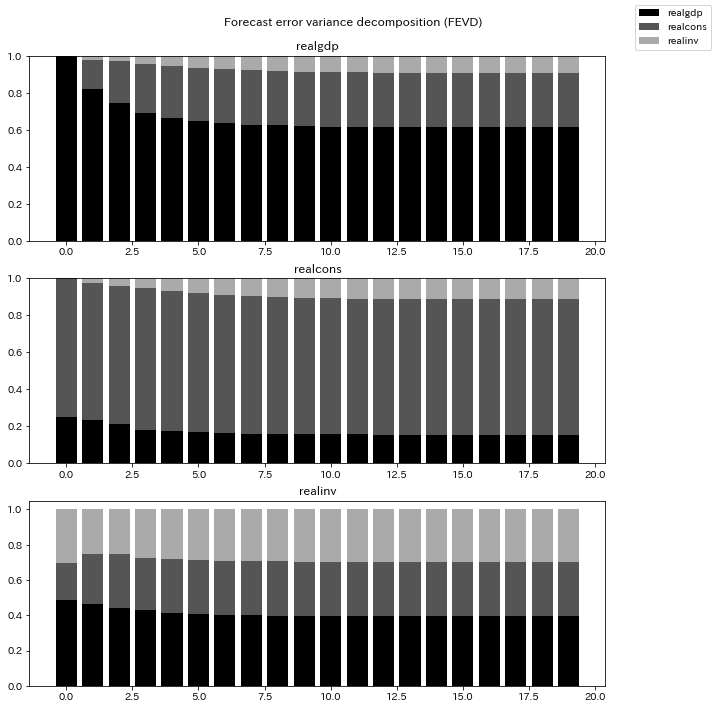

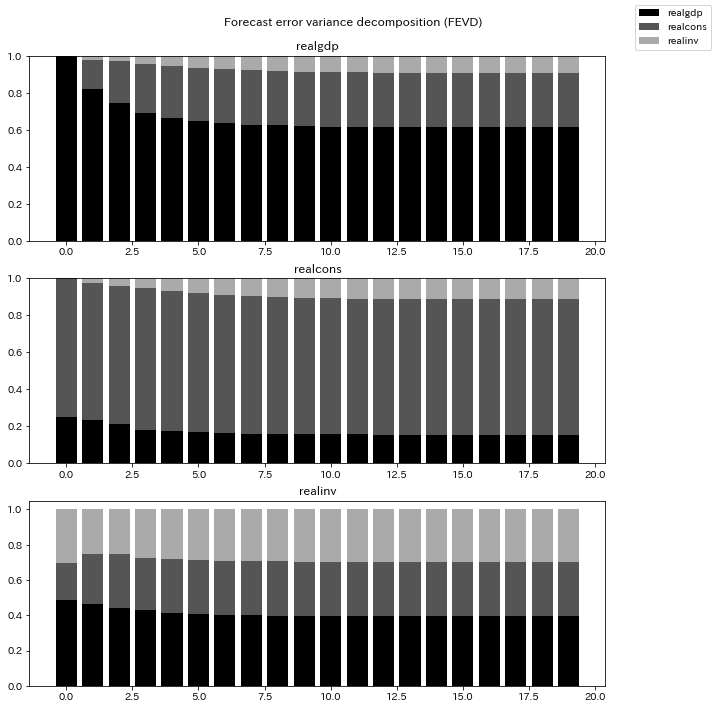

In [8]:
fevd_result.plot()